# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('orange_small_churn_data.train.txt', header = 0)
y = pd.read_csv('orange_small_churn_labels.train.txt', header = None).values
df['Churn'] = y
print(df.shape)
df.head(10)

(40000, 231)


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Churn
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,...,6Uh67Lk,LM8l689qOp,NaN,NaN,453m,02N6s8f,F2FyR07IdsN7I,NaN,NaN,-1
6,NaN,NaN,NaN,NaN,NaN,889.0,0.0,NaN,NaN,NaN,...,d0BOtEt,LM8l689qOp,NaN,NaN,3Cy4,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
7,NaN,NaN,NaN,NaN,NaN,161.0,0.0,NaN,NaN,NaN,...,AmO2pc5,LM8l689qOp,NaN,NaN,5Acm,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
8,NaN,NaN,NaN,NaN,NaN,420.0,0.0,NaN,NaN,NaN,...,APgu8Zv,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
9,NaN,NaN,NaN,NaN,NaN,1155.0,0.0,NaN,NaN,NaN,...,JaZwBif,LM8l689qOp,NaN,NaN,uWr3,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In [3]:
sum(df.describe().iloc[0,:] == 0)

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


18

Выводы:
* всего в датасете 230 переменных (190 целочисленных и 40 категориальных) и 40000 наблюдений
* в датасете очень много пропущенных значений
* отсутствуют значения для всех наблюдений для 18 переменных, ниже мы их удалим из датасета, как не имеющие никакого смысла

2\. Рассчитайте доли классов `отток` и `не отток`.

In [28]:
df_train, df_test = train_test_split(df.values, test_size = 0.2, stratify = df['Churn'].values, random_state = 147)
df_test = pd.DataFrame(df_test, columns = df.columns)
df_test.to_csv('test_churn.csv', sep = ',', header = True, index = False)
df_train = pd.DataFrame(df_train, columns = df.columns)
df_train.to_csv('train_churn.csv', sep = ',', header = True, index = False)

In [27]:
df_train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,Churn
0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,...,VOHAgOW,LM8l689qOp,NaN,NaN,Xa3G,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,Vo68gbh,NaN,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,203,0,NaN,NaN,NaN,...,NnYzgmc,NaN,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,105,0,NaN,NaN,NaN,...,ygD7j0h,LM8l689qOp,NaN,NaN,5Acm,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
4,NaN,NaN,NaN,NaN,NaN,84,0,NaN,NaN,NaN,...,smo7DIf,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In [4]:
df['Churn'].value_counts() / len(df)

-1    0.9256
 1    0.0744
Name: Churn, dtype: float64

Выводы:
* 92.5% клиентов в датасете сохранили лояльность оператору, 7.5% перешли к другому

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [3]:
df_cat = df.iloc[:,190:].dropna(axis = 1, how = 'all')
for column in df_cat.columns:
    if column != 'Churn': 
        df_cat[column] = df_cat[column].astype('category')
print(df_cat.shape)

(40000, 39)


In [6]:
def scaling(x):
    return((x - x.mean(skipna = True)) / x.std(skipna = True))

In [7]:
df_num = df.iloc[:,:190].dropna(axis = 1, how = 'all')
for feature in df_num.columns:
    df_num[feature] = scaling(df_num[feature])
df_num['Churn'] = y
df_num_1 = df_num[df_num['Churn'] == 1]
df_num_m1 = df_num[df_num['Churn'] == -1]
print(df_num.shape)
df_num.head(10)

(40000, 175)


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,Churn
0,NaN,NaN,NaN,NaN,NaN,0.663645,NaN,NaN,NaN,NaN,...,-0.245015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,0.188925,0.033063,NaN,NaN,NaN,...,-0.245015,NaN,NaN,NaN,NaN,NaN,NaN,0.062434,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,0.242565,0.033063,NaN,NaN,NaN,...,-0.245015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,0.081643,0.033063,NaN,NaN,NaN,...,-0.245015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,-0.242884,0.033063,NaN,NaN,NaN,...,-0.245015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
5,-0.314811,NaN,NaN,NaN,NaN,NaN,NaN,-0.118853,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.373525,0.108139,NaN,-1.113717,NaN,-1
6,NaN,NaN,NaN,NaN,NaN,-0.165104,-1.080296,NaN,NaN,NaN,...,-0.245015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
7,NaN,NaN,NaN,NaN,NaN,-0.444036,-1.080296,NaN,NaN,NaN,...,-0.245015,NaN,NaN,NaN,NaN,NaN,NaN,-0.214308,NaN,-1
8,NaN,NaN,NaN,NaN,NaN,-0.344801,-1.080296,NaN,NaN,NaN,...,-0.245015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
9,NaN,NaN,NaN,NaN,NaN,-0.063187,-1.080296,NaN,NaN,NaN,...,-0.245015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [8]:
correlations = pd.DataFrame(df_num_m1.iloc[:,:(df_num_m1.shape[1]-1)].mean(axis = 0, skipna = True) - 
                            df_num_1.iloc[:,:(df_num_1.shape[1]-1)].mean(axis = 0, skipna = True), 
                            columns = ['correlation']).dropna().sort_values(by = 'correlation')
correlations.describe()

,correlation
count,173.000000
mean,0.018051
std,0.134591
min,-0.481435
25%,-0.038532
50%,0.029594
75%,0.086576
max,0.563113


Выводы:
* Для бинарной и количественной переменной в качестве корреляции мы используем разность матожиданий масштабированной количественной переменной в зависимости от бинарной, чем она больше по модулю, тем более коррелированы переменные
* В данном случае мы видим, что корреляция принимает значения от -0.48 до 0.56 

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [9]:
np.random.seed(0)
correlations = abs(correlations).sort_values(by = 'correlation', ascending = False)
max_index = list(correlations.index[0:20])
min_index = list(correlations.index[-10:])
random_index = list(correlations.index[np.random.randint(1, len(correlations), 10)])

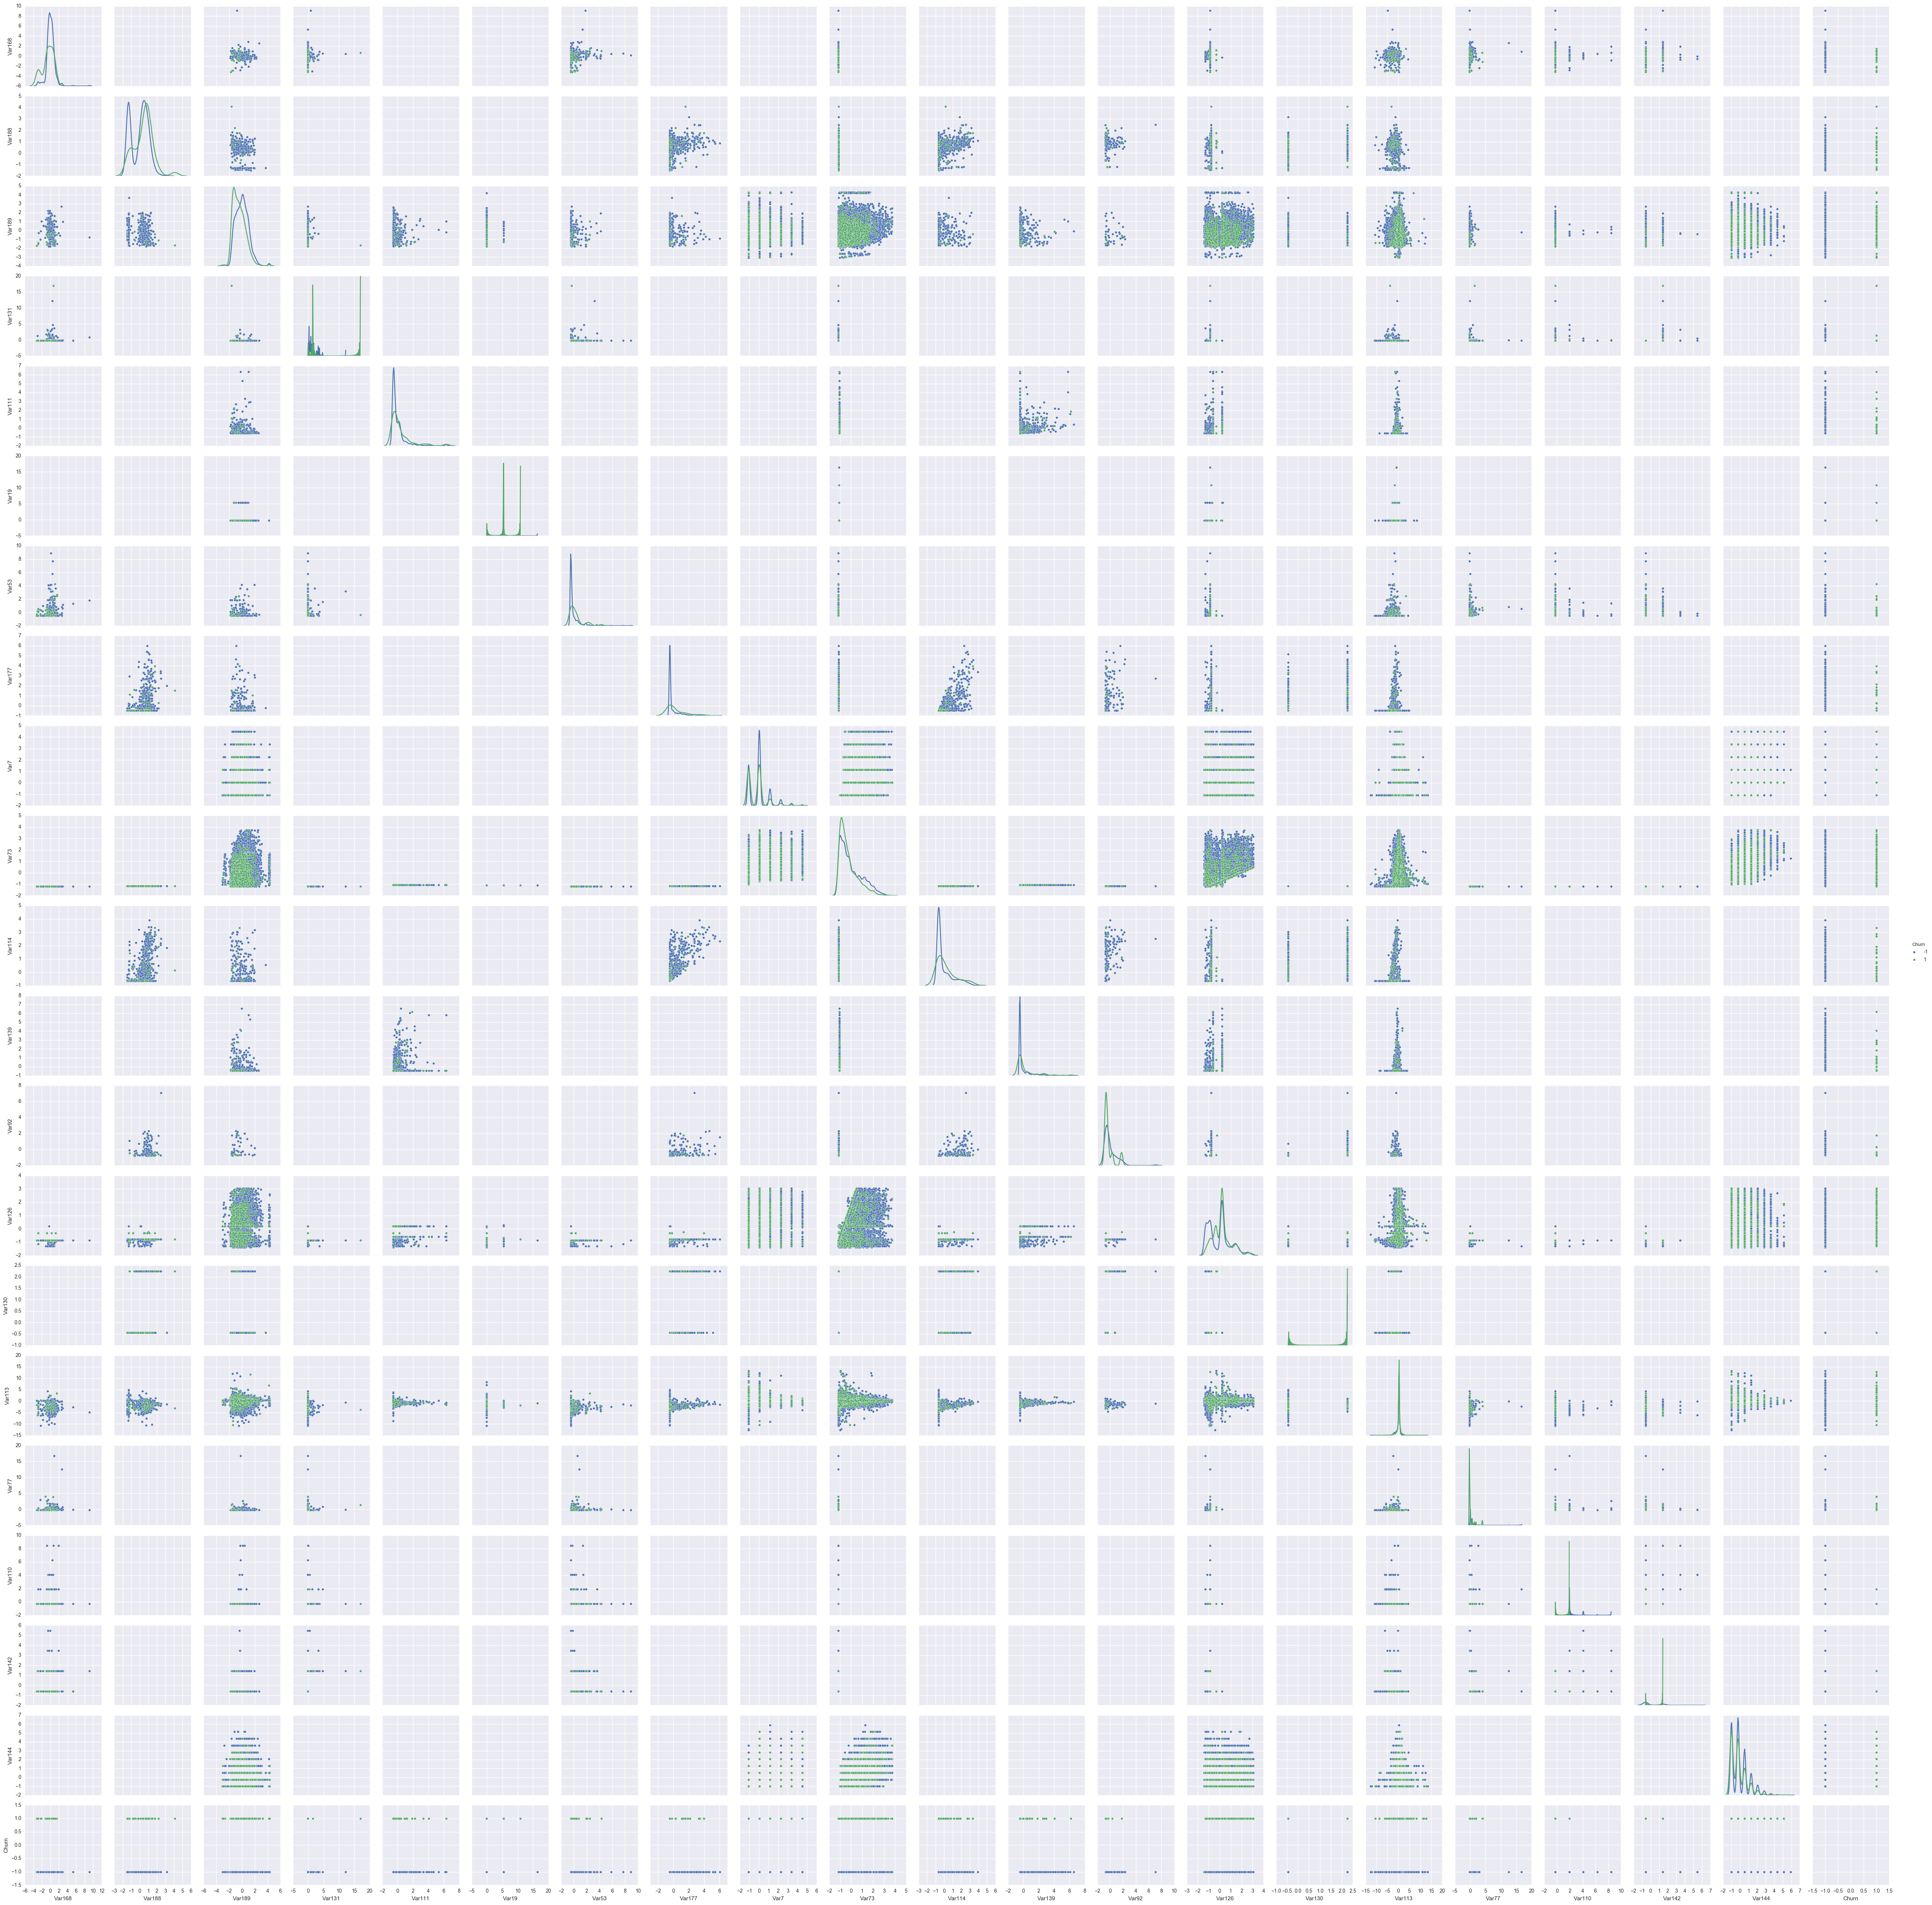

In [58]:
seaborn.pairplot(df_num[max_index+['Churn']], hue = 'Churn', diag_kind = 'kde')

Выводы:
* в силу большой разреженности данных, многие попарные графики вовсе не имеют общих точек
* как следствие предыдущего пункта и небольшого числа абонентов, разорвавших контракт, зеленых точек на многих графиках слишком мало
* если имеется много наблюдений разных классов, то облака точек сильно коррелированных переменных не сливаются в одно облако
* практически для любого графика с достаточным числом наблюдений имеются выбросы

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

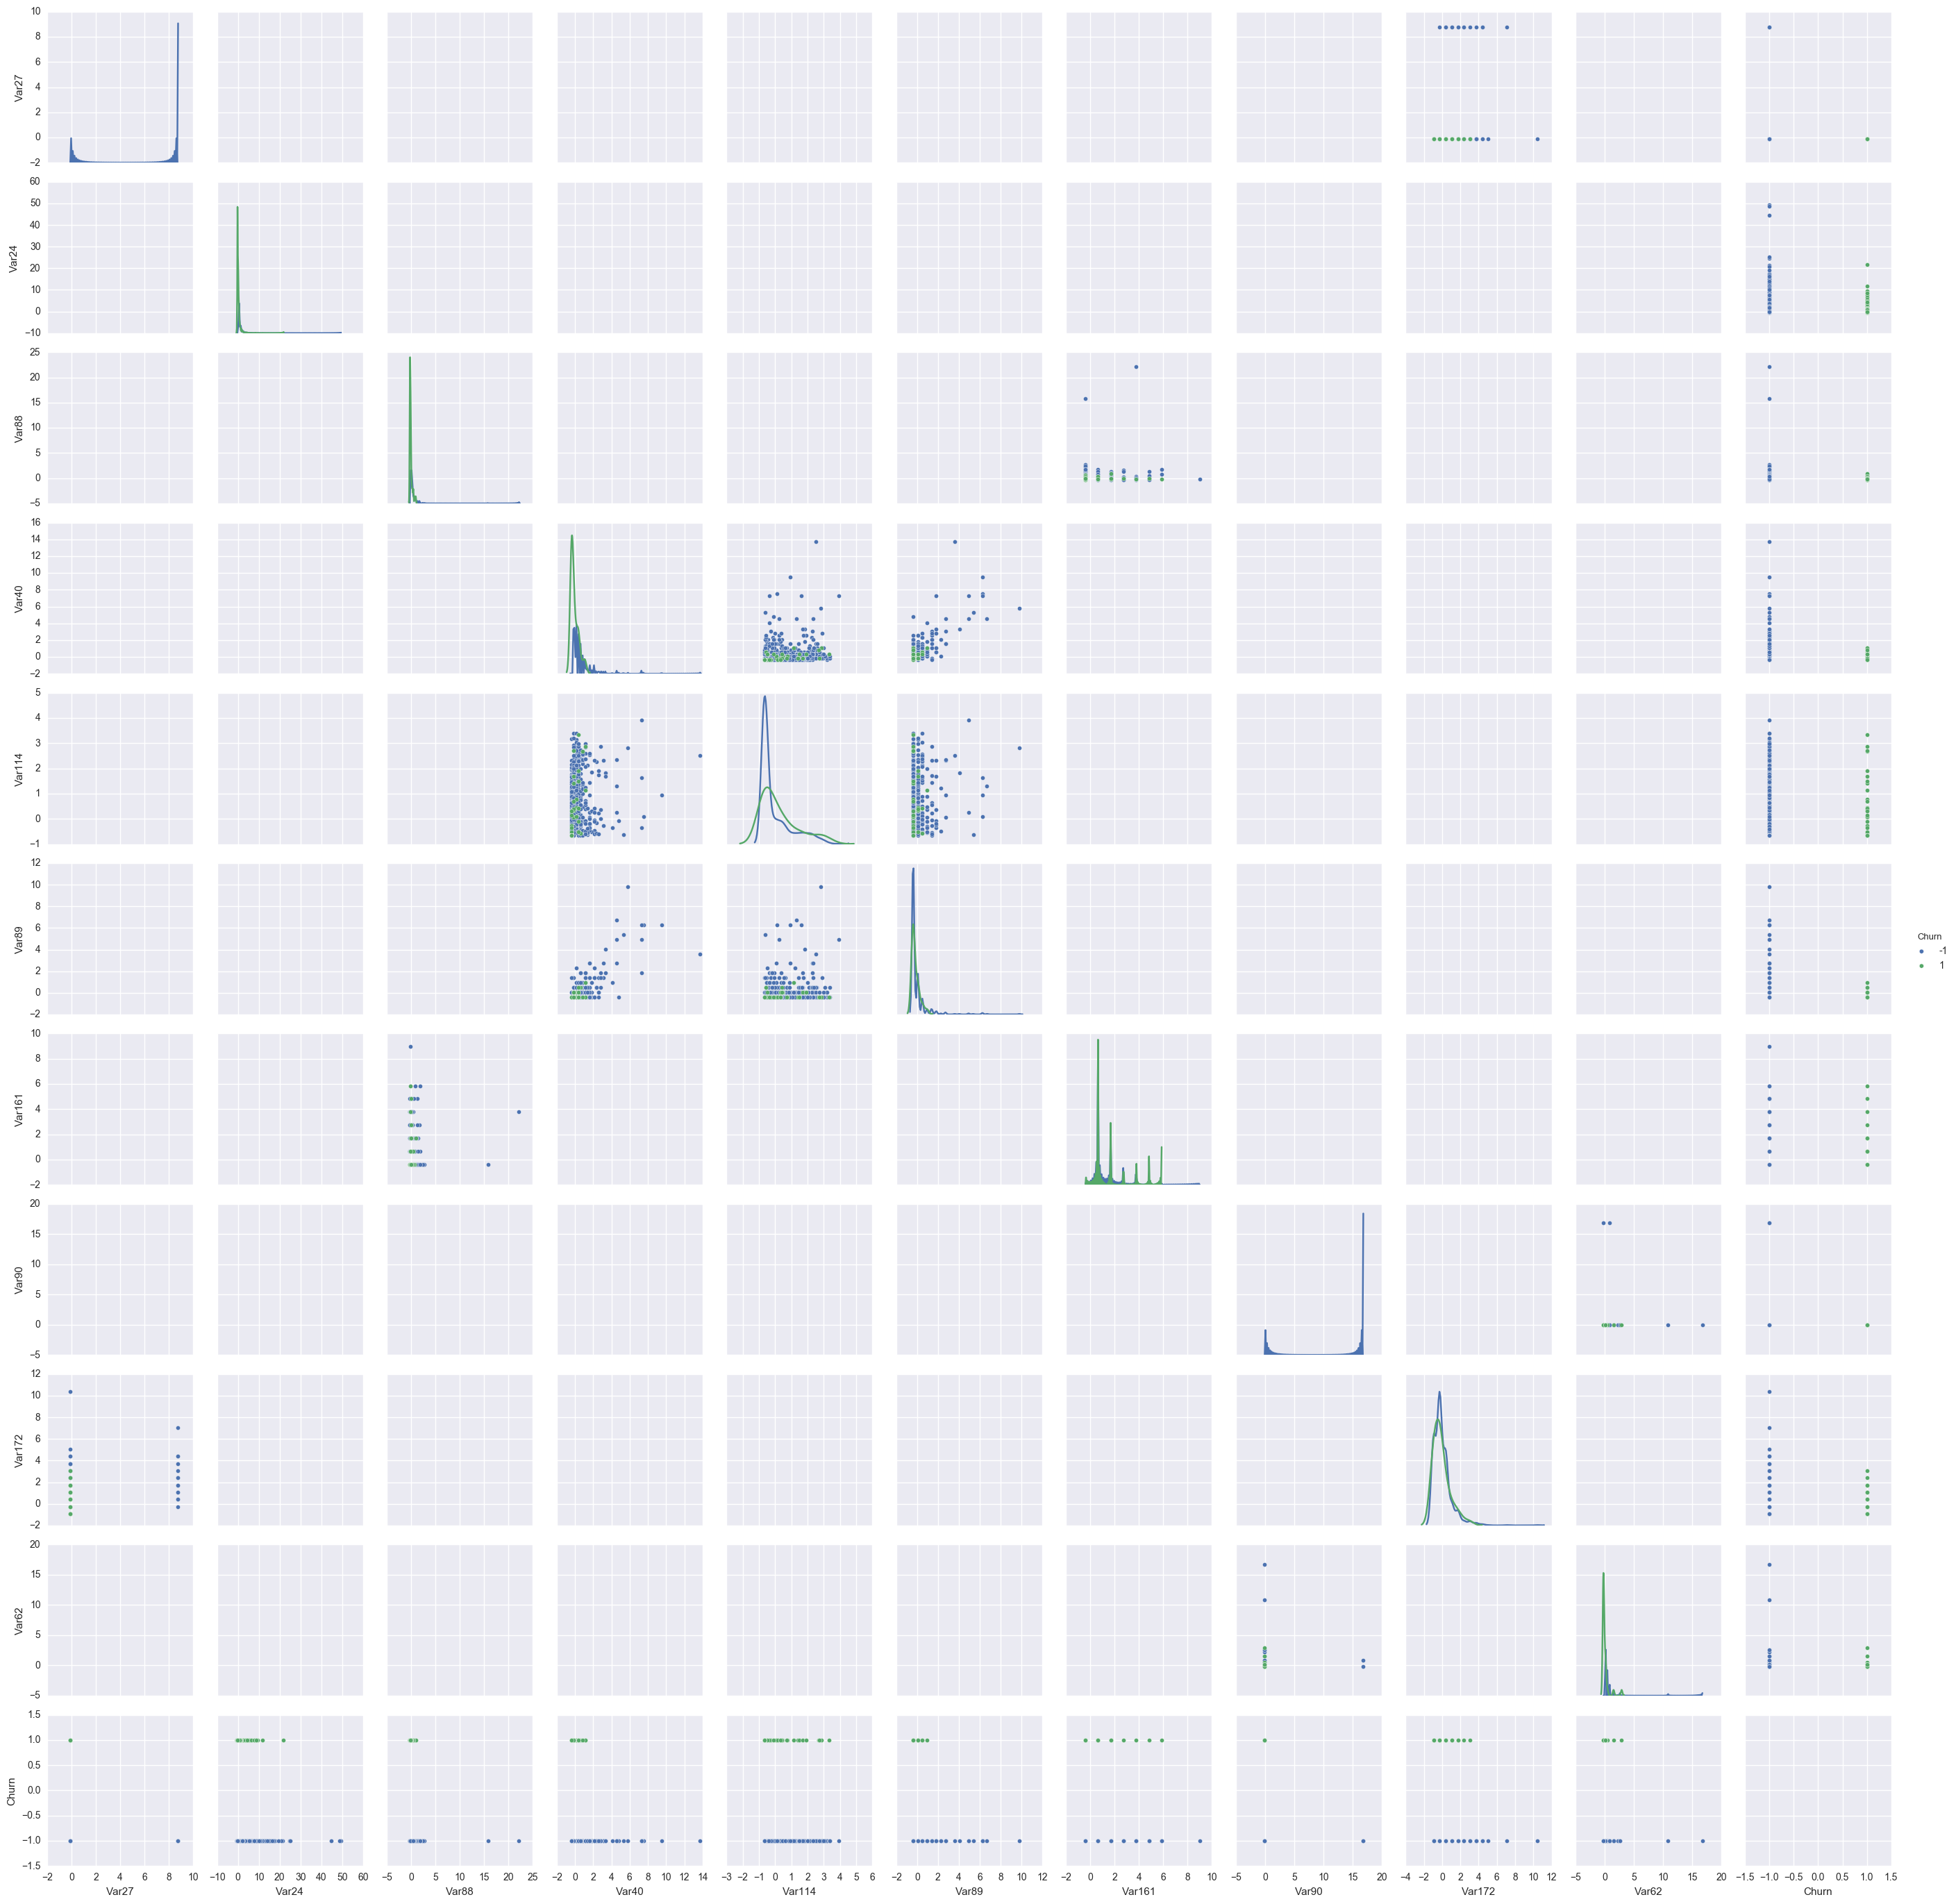

In [59]:
seaborn.pairplot(df_num[random_index+['Churn']], hue = 'Churn', diag_kind = 'kde')

Выводы:
* По-прежнему очень много разреженных данных
* Среди признаков есть такие, у которых облака точек двух классов достаточно сильно различаются
* Среди числовых признаков есть признаки, принимающие лишь несколько значений, бинарные или даже константные

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

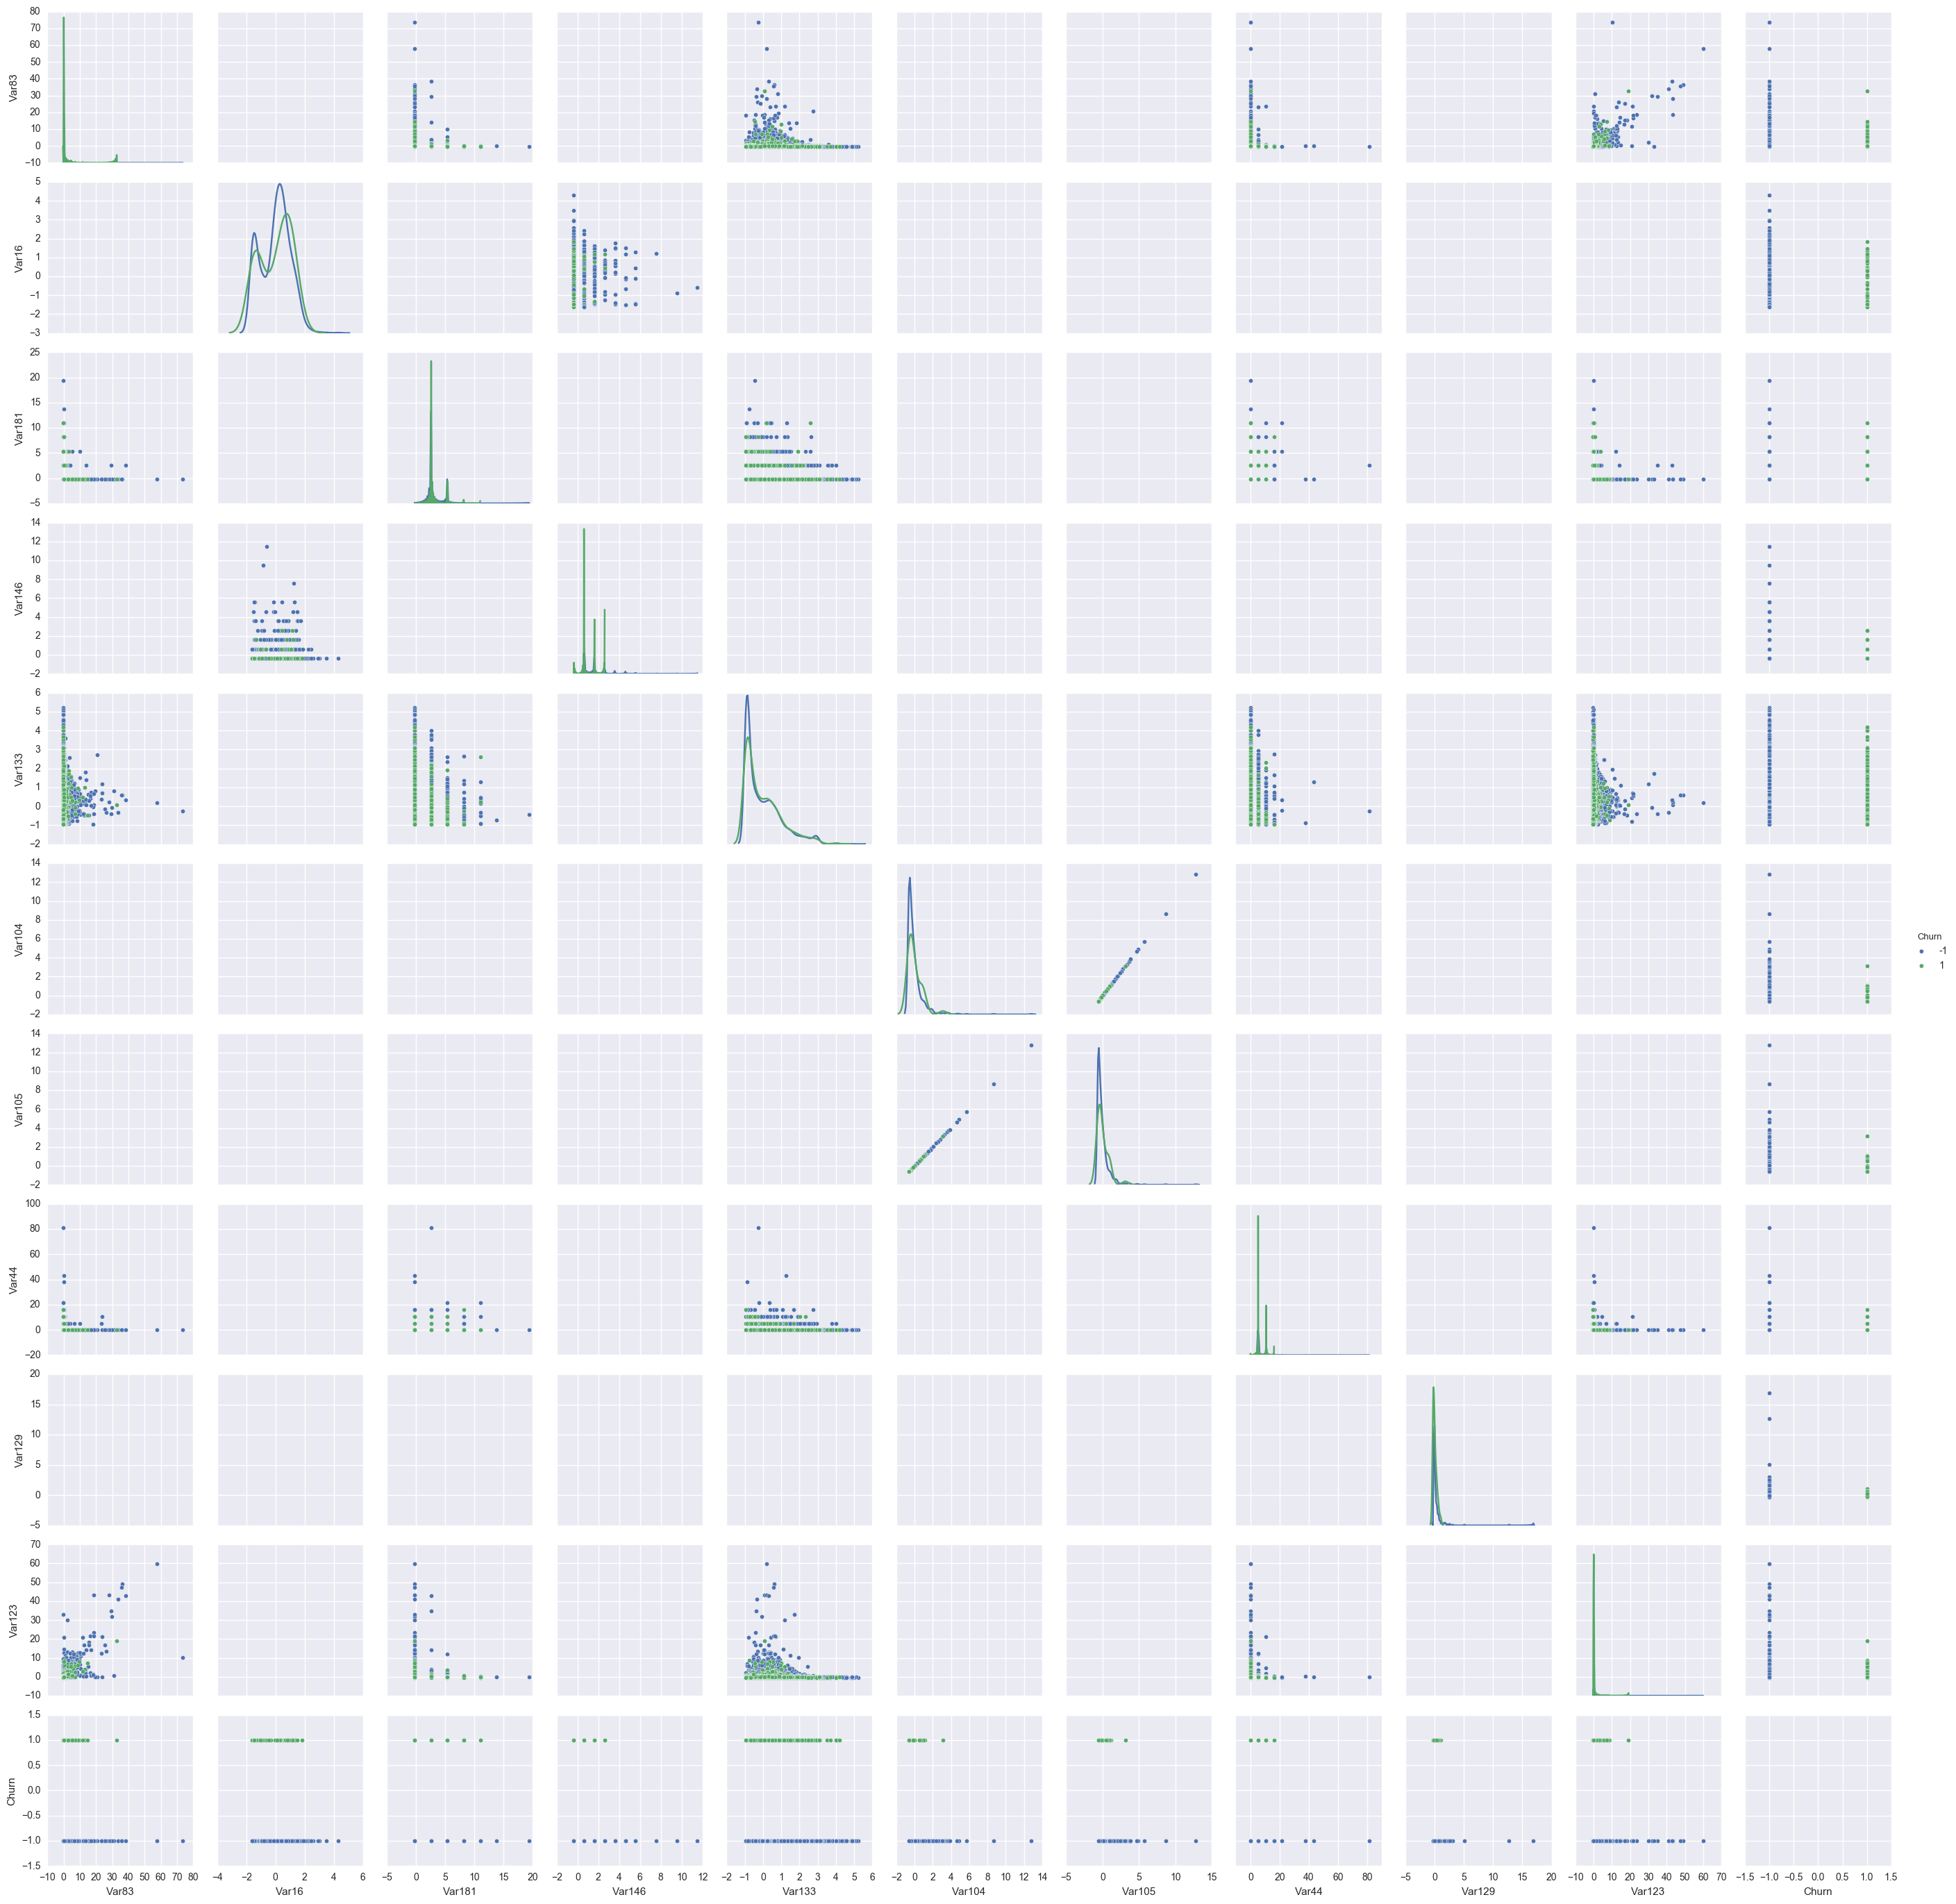

In [10]:
seaborn.pairplot(df_num[min_index+['Churn']], hue = 'Churn', diag_kind = 'kde')

Выводы:
* зависимость между признаками 104 и 105 очень близка к линейной.

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

Примечание: в процессе построения гистограмм столкнулся с проблемой очень медленной работы seaborn.countplot для отдельных категориальных переменных, исследование показало, что многие переменные являются категориальными с очень большим числом категорий, вплоть до 13 тысяч. Для гистограмм отобраны переменные, имеющие не более 30 категорий. 

In [6]:
cat_sorted = df_cat.drop('Churn', axis = 1).describe().iloc[1,:].sort_values()
cat_index = list(cat_sorted[cat_sorted < 50].index)
len(cat_index)

24

In [9]:
df_cat.drop('Churn', axis = 1).describe().iloc[1,:].sort_values()
many_index = list(cat_sorted[cat_sorted > 10].index)
for feature in many_index:
    print(df[feature].value_counts())

me75fM6ugJ                   28047
7M47J5GA0pTYIFxg5uy           5526
DHn_WUyBhW_whjA88g9bvA64_     2796
Kxdu                          1544
NKv3VA1BpP                    1005
GjJ35utlTa_GNSvxxpb9ju         857
6C53VA1kCv                      91
5iay                            65
EBKcR3s6B22tD6gC36gm6S          26
15TtzZrRt2                      21
0MCPoln                         12
wXfldy7                          7
o0ZZAVSQ32YuE                    2
tMBVJkA0xJMEATvl4ht              1
Name: Var207, dtype: int64
IYzP       13854
zm5i        5151
sYC_        3180
haYg        2311
hAFG        2260
wMei        1423
43pnToF     1225
kxE9        1209
y6dw        1200
6JmL         878
lVqb         630
Tkho         532
hzlB         323
giwq         323
itlM         312
CoYW         197
oZyB         194
69fI         181
G_zk          95
TIA9          81
409L           6
Name: Var206, dtype: int64
FzaX          32191
AU8pNoi         911
qxDb            883
OFWH            652
AU8_WTd         451

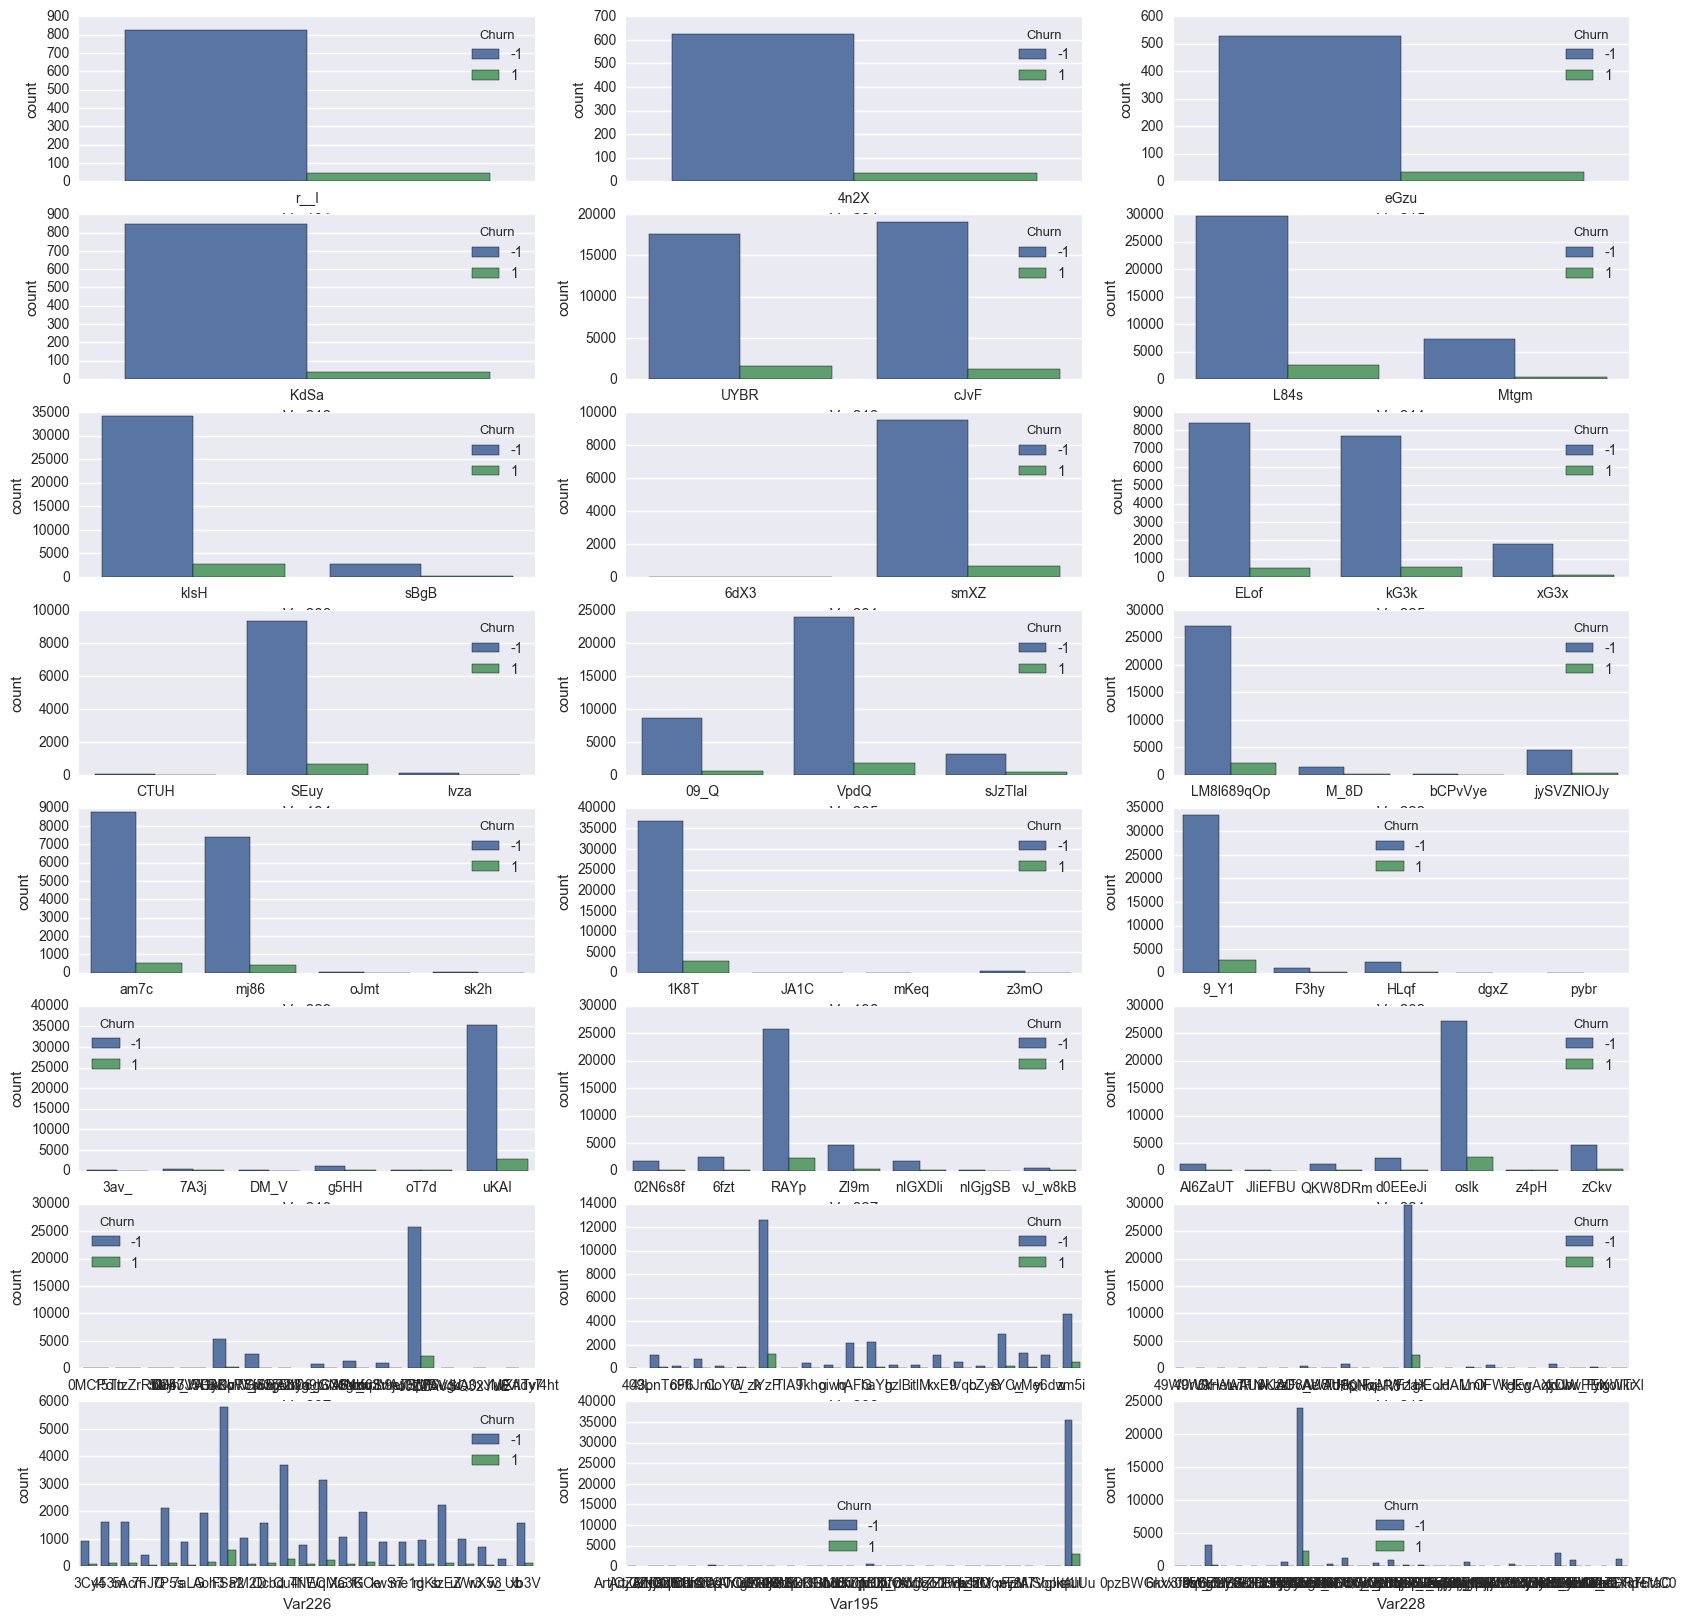

In [36]:
plt.figure(figsize = (20, 20))
for number, feature in enumerate(cat_index):
    plt.subplot(8, 3, number+1)
    seaborn.countplot(x = feature, data = df_cat, hue = 'Churn')

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Анализ результатов:
* Данные являются очень разреженными, практически для каждой переменной есть пропущенные значения, а некоторые только из них и состоят, имеются числовые переменные, очень сильно как положительно, так и отрицательно коррелирующие с принадлежностью к классу, но более половины переменных имеют корреляцию менее 0.1. По построенным графикам видно, что не хватает наблюдений клиентов, разорвавших контракт, количество зеленых точек мало, тем не менее на попарных графиках некоторых переменных достаточно наблюдений обоих классов, и области их значаний визуально легко разделимы. По гистограммам не видно, что для какой то категориальной переменной, принадлежность к определенному классу имеет аномально большое число.
* Стоит предположить, что наибольшее влияние окажут переменные, для которых число отсутствующих значений невелико, для которых имеется достаточно много наблюдений для обоих классов, которые коррелированы с целевой переменной, и которые на попарном графике визуально легко разделимы. Примерами таких переменных например могут быть переменные 189 и 73.
* Переменные, которые имеют малое число наблюдений и практически не представлены в одном из классов. Например пусть у нас есть переменная, которая имеет 50 наблюдений, все из класса -1, и которая равно 0 для 30 наблюдений и 2 для 20. Пользы от такой переменной явно немного. Ну а реальным примером бесполезной переменной может быть переменная 230, которая равна NaN для всех наблюдений.
* Такой предварительный отбор признаков позволяет все же не выбрать наиболее важные переменные, а выкинуть самые бесполезные (их уже выкинуто 18). Подобный отбор не сильно скажется на быстроте построения модели и практически не скажется на ее качестве, модель сможет сама распознать шум и придать этим признакам незначительные веса или вовсе обнулить их в случае  L1 регуляризации. Тем не менее его стоит применять, так как он позволит не только выкинуть переменные, но и лучше понять данные и их структуру.